In [1]:
## Reduce high cardinality columns to low cardinality columns with clustering techniques.

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import mutual_info_regression

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


plt.style.use('seaborn-whitegrid')

In [4]:
train = pd.read_csv('inputs/Train.csv')
test = pd.read_csv('inputs/Test.csv')

In [5]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [6]:
#make a copy of the traib and test data.
train_copy = train.copy()
test_copy = test.copy()

### Mathematical transformations for skewed features.

<AxesSubplot:xlabel='target', ylabel='Density'>

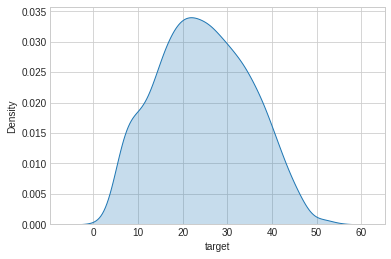

In [7]:
sns.kdeplot(train_copy.target, shade = True)

In [8]:
PATTERN = r'[\d\s]+:'
train_copy['Ward_Category'] = train_copy['ward'].str.replace(PATTERN, '', regex = True)

In [9]:
def create_code_category(data_frame):
    data_frame['Code_Category'] = data_frame['ADM4_PCODE'].str[:3]
    data_frame['Code_Category'] = data_frame['Code_Category'].map({
        'ZA5' : 'ZA5', 'ZA7' : 'ZA7', 'ZA9' : 'ZA9',
        'ZA6' : 'ZA6', 'ZA8' : 'ZA8', 'ZA4' : 'ZA4',
        'ZA3' : 'ZA3', 'ZA2' : 'ZA2', 'ZA1' : 'ZA1'})
    return data_frame

train_copy = create_code_category(train_copy)
test_copy = create_code_category(test_copy)

In [10]:
cat_cols = [cols for cols in train_copy.columns if train_copy[cols].dtype == 'object']
num_cols = [cols for cols in train_copy.columns if train_copy[cols].dtype == np.number]
total_cols = cat_cols + num_cols

/tmp/ipykernel_139321/4269750338.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  num_cols = [cols for cols in train_copy.columns if train_copy[cols].dtype == np.number]


In [21]:
#Preprocessing for numerical data.
scaler = MinMaxScaler(feature_range = (0, 1))

#Preprocessing for categorical data.
categorical_transformer = Pipeline(
    steps = [
        ('encoder', OrdinalEncoder(handle_unknown = 'error'))
    ]
)

#Building preprocessing for both numerical and categorical data.
preprocessor = ColumnTransformer(
    transformers = [
        ('scale', scaler, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
#Define model.
model = TransformedTargetRegressor(regressor = preprocessor, transformer = MinMaxScaler())


train_test_pipeline = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ]
)

In [22]:
X = train_copy.drop('target', axis = 1)
y = train_copy['target']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

another_pipeline.fit(X_train, y_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [24]:
# cv = KFold(n_splits = 10, shuffle = True, random_state = 42)
# scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = 6, error_score='raise')
# scores = abs(scores)
# s_mean = np.mean(scores)
# print(f'Mean MAE is {s_mean:.3f}')

In [22]:
# #Cluster the 'ADM4_PCODE' with the ward feature.
# kmeans = KMeans(n_clusters = train.Code_Category.nunique())
# train['Cluster'] = kmeans.fit_predict(train.loc[:, ['Code_Category', 'ADM4_PCODE', 'ward']])
# train['Cluster'] = train['Cluster'].astype('category')
# train.head()

In [24]:
# train['Cluster'].nunique()

In [23]:
# sns.catplot(x = 'Code_Category', y = 'ADM4_PCODE', hue = 'Cluster', data = train, height = 6)

In [19]:
#The ADM4_PCODE category will be clustered with the code category , then drop the code category.

In [20]:
# X.loc[:, ['ADM4_PCODE', 'ward']].nunique()

<AxesSubplot:xlabel='lat', ylabel='lon'>

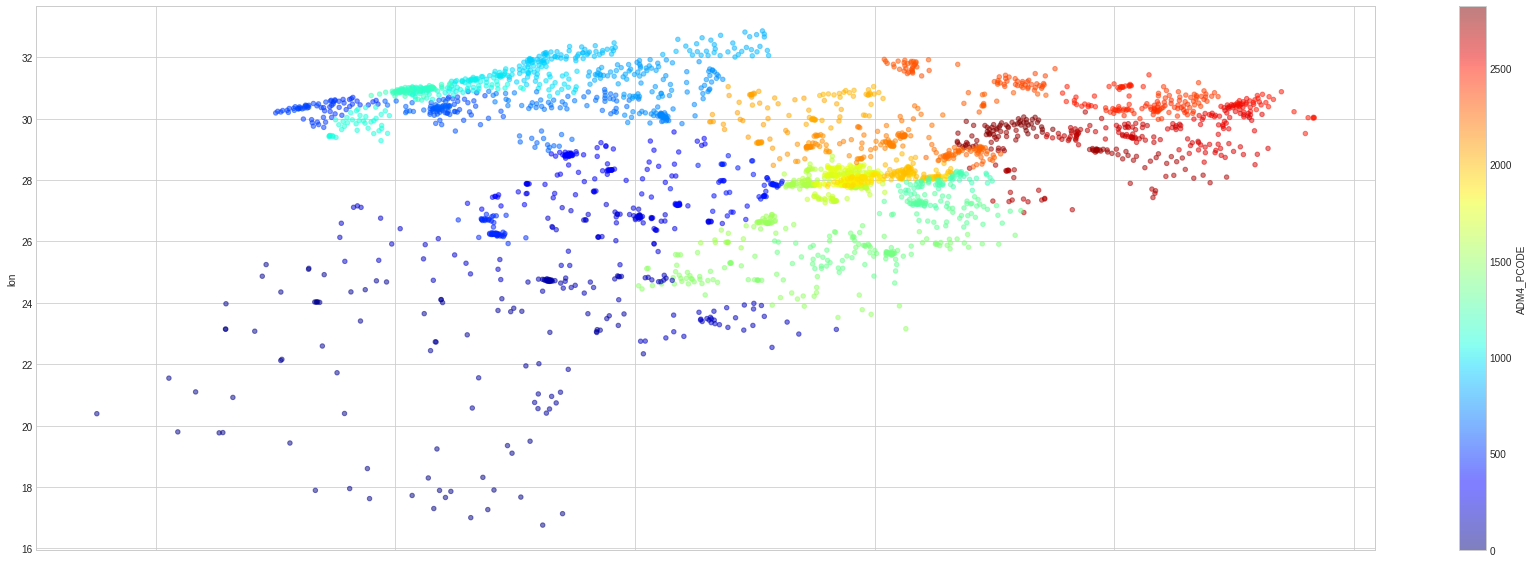

In [21]:
#Show the distribution of code category across latitude and longitude.
train.plot(kind = 'scatter', x = 'lat', y = 'lon',  alpha = 0.5, c = 'ADM4_PCODE', 
           cmap = plt.get_cmap('jet'), colorbar = True, figsize = (30, 10))

<AxesSubplot:xlabel='lat', ylabel='lon'>

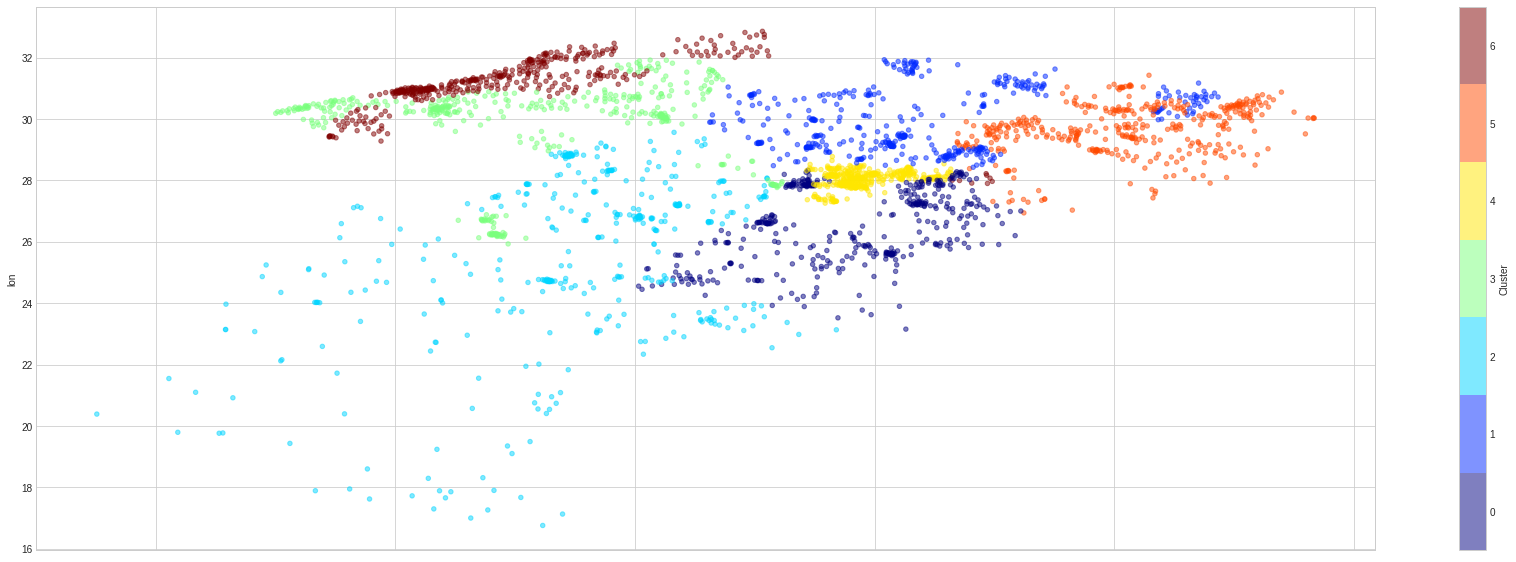

In [22]:
#Show the distribution of code category across latitude and longitude.
train.plot(kind = 'scatter', x = 'lat', y = 'lon',  alpha = 0.5, c = 'Cluster', 
           cmap = plt.get_cmap('jet'), colorbar = True, figsize = (30, 10))

<AxesSubplot:>

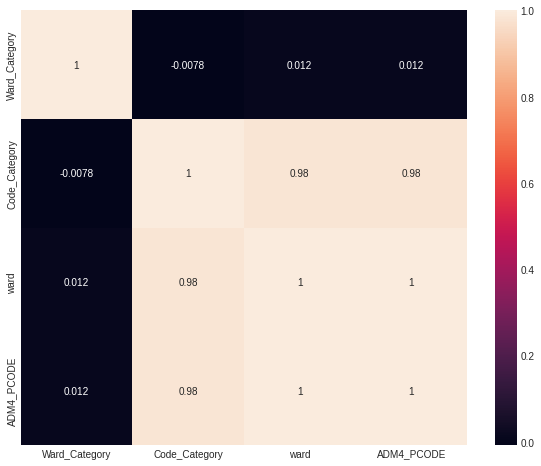

In [23]:
#Relationship between ward category and code category.
X = train.loc[:, ['Ward_Category', 'Code_Category', 'ward', 'ADM4_PCODE']]
plt.figure(figsize = (10, 8))
sns.heatmap(X.abs().corr(), annot = True)

In [39]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [40]:
X = train.drop('target', axis = 1)
y = train['target']
discrete_features = X.dtypes == int

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

psa_00    0.538925
pw_00     0.520084
car_00    0.508647
car_01    0.508647
pg_00     0.503256
            ...   
lan_13    0.000000
pw_07     0.000000
pw_08     0.000000
dw_12     0.000000
dw_13     0.000000
Name: MI_scores, Length: 65, dtype: float64

In [41]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information scores')

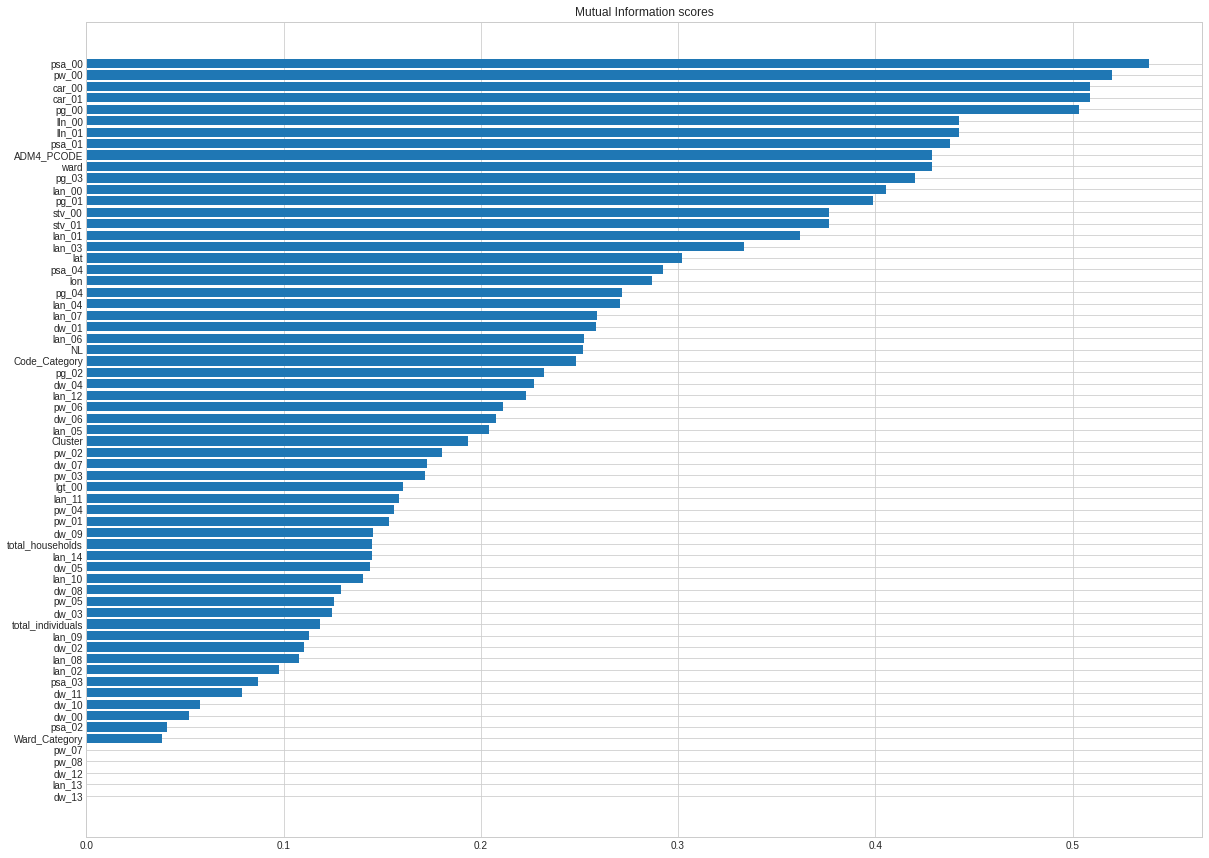

In [42]:
plt.figure(figsize = (20, 15))
plot_mi_scores(mi_scores)